In [190]:
import shap
import torch
import numpy as np
from ipynb.fs.full.maintanance_agent import MaintainanceDataset,ACTIONS

# Enable the plots in jupyter
shap.initjs()

In [191]:
SAMPLE_SIZE = 10

model = torch.load('maintanance_agent.pt')
torch.set_grad_enabled(True)
cold_start = MaintainanceDataset().cold_start
X, Y = [], []
feature_names = list(cold_start()[0].keys())
print(feature_names)
for _ in range(SAMPLE_SIZE):
    x, y = cold_start()
    X.append(list(x.values()))
    Y.append(y)

data = torch.tensor(X).float()
e = shap.DeepExplainer(model, data)
shap_values = e.shap_values(data)
expected_value = list(e.expected_value)
data = data.numpy()

['free_space_ratio', 'service_size_ratio', 'cached_in_L1', 'cached_in_L2', 'cached_in_L3', 'service_charm', 'service_request_frequency', 'ES_request_frequency', 'es_cache_miss_rate', 'least_freq_index', 'is_ugent']


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


## 指定动作的decision_plot（多个观测样本）

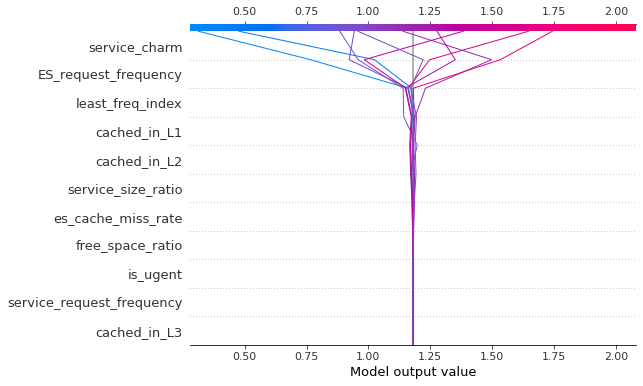

In [192]:
action_index = 0

shap.decision_plot(
    base_value=expected_value[action_index],
    shap_values=shap_values[action_index],
    features=data,
    feature_names=feature_names)


## 指定动作的decision_plot（单个观测样本）

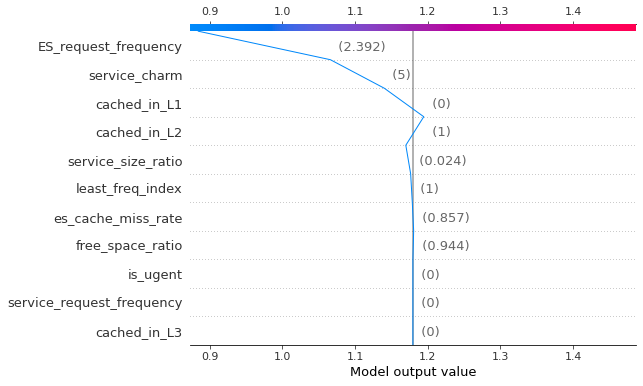

In [193]:
action_index = 0
sample_index = 5
shap.decision_plot(
    base_value=expected_value[action_index],
    shap_values=shap_values[action_index][sample_index],
    features=data[sample_index],
    feature_names=feature_names)

## 所有动作的decision_plot

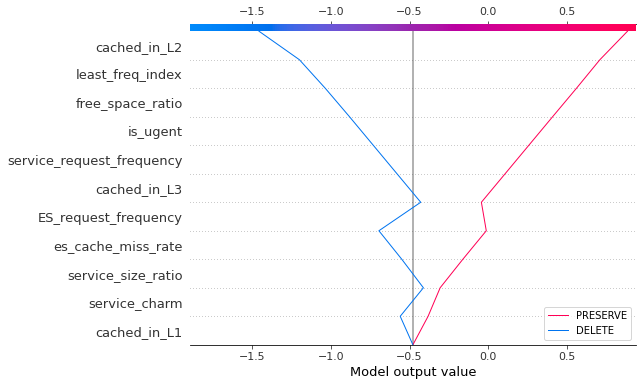

In [194]:
shap.multioutput_decision_plot(base_values=expected_value,
                               shap_values=shap_values,
                               row_index=sample_index,
                               feature_names=feature_names,
                               legend_labels=ACTIONS,
                               legend_location='lower right')

## 指定动作的dependence_plot

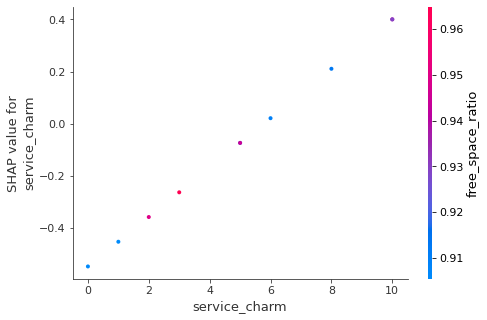

In [195]:
action_index = 0
shap.dependence_plot(
    ind="service_charm",
    shap_values=shap_values[action_index],
    features=data,
    feature_names=feature_names,
)

## 指定动作的waterfall_plot

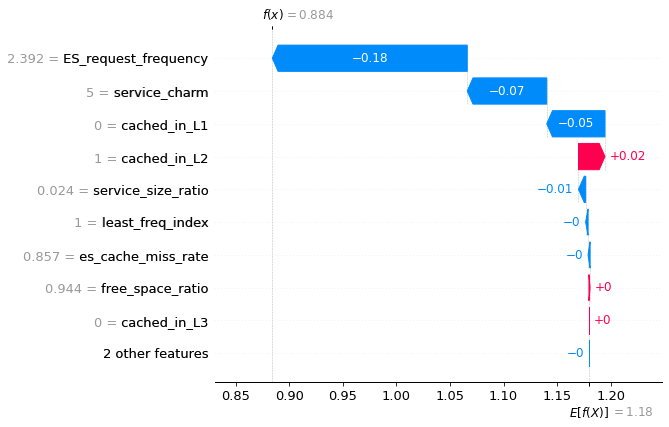

In [196]:
action_index = 0
shap_exp = shap.Explanation(values=shap_values[action_index],
                            base_values=expected_value[action_index],
                            data=data,
                            feature_names=feature_names)
shap.waterfall_plot(shap_exp[sample_index], max_display=10)

## 指定动作的heatmap

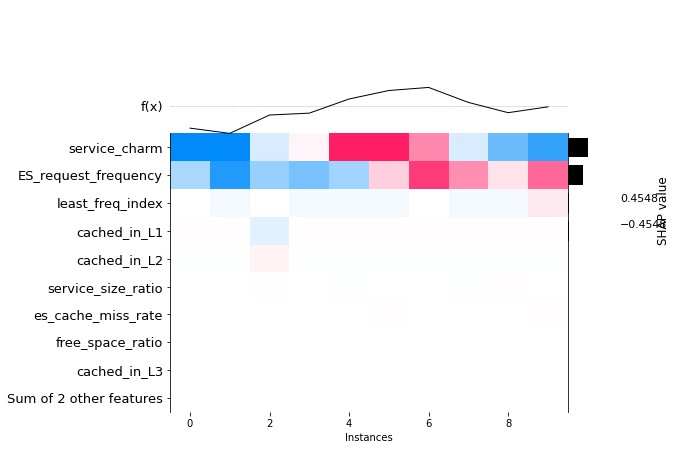

In [197]:
action_index = 0
shap_exp = shap.Explanation(values=shap_values[action_index],
                            base_values=expected_value[action_index],
                            data=data,
                            feature_names=feature_names)
shap.plots.heatmap(shap_exp)

## 指定动作的两个类型观测样本间的group_difference_plot

Mean of empty slice.
invalid value encountered in true_divide
invalid value encountered in reduce
invalid value encountered in reduce
FixedFormatter should only be used together with FixedLocator


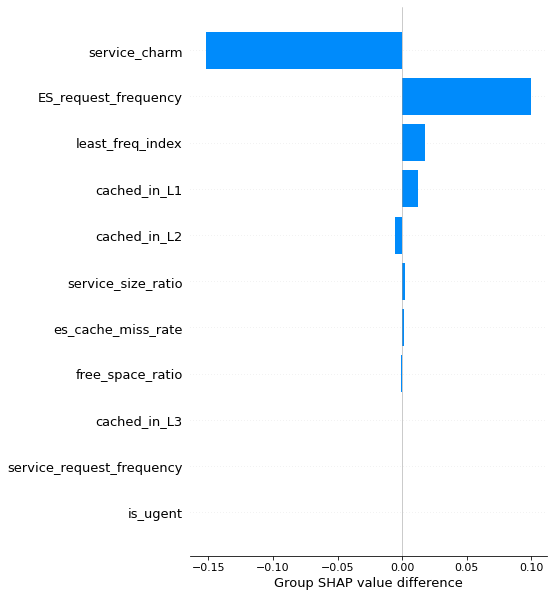

In [198]:
action_index = 0

temp = shap_values[action_index]
group_mask = np.zeros(len(temp), dtype=bool)  # 初始化为全 False 数组
group_mask[:5] = True  # 将前 5 个样本标记为 True
shap.group_difference_plot(np.array(temp), group_mask, feature_names=feature_names)

## 所有动作的summary_plot

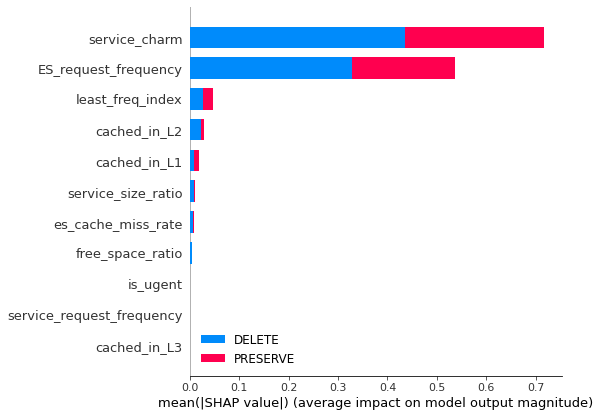

In [199]:
shap.summary_plot(shap_values, data, feature_names,class_names=ACTIONS)

## 指定动作的summary_plot

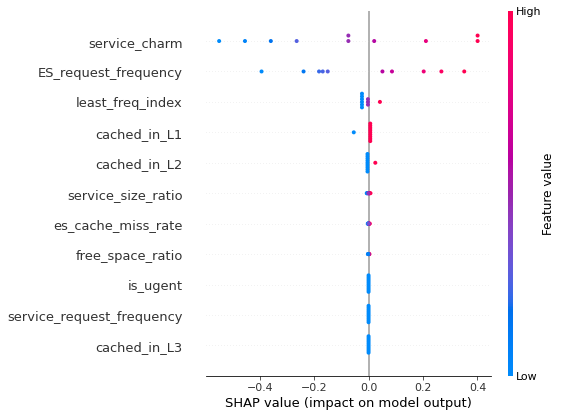

In [200]:
action_index = 0
shap.summary_plot(shap_values[action_index], data, feature_names)

## 指定动作的force_plot

In [201]:
action_index = 0

shap.force_plot(base_value=expected_value[action_index],
                shap_values=shap_values[action_index],
                features=data,
                feature_names=feature_names)


## 指定动作和观测样本的force plot

In [202]:
action_index = 0
sample_index = 5
shap.force_plot(base_value=expected_value[action_index],
                shap_values=shap_values[action_index][sample_index],
                features=data[sample_index],
                feature_names=feature_names)

## barplot

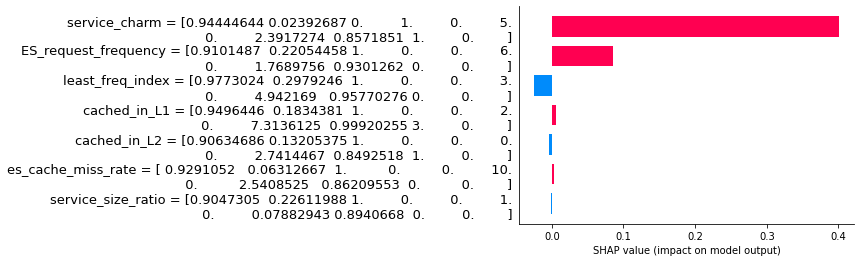

In [220]:
shap.bar_plot(shap_values[action_index][0], data[0], feature_names)